In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\thris\\Desktop\\Mall_Customers.csv")
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [3]:
df=df.drop("CustomerID",axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [5]:
df.shape

(200, 4)

In [6]:
df.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])

In [8]:
df.head(1)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39


In [9]:
x=df

cols=df.columns

In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)


In [11]:
x=pd.DataFrame(x,columns=cols)
x.head(1)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801


In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [18]:
Kmeans=KMeans(n_clusters=2,random_state=0)
lab=Kmeans.fit_predict(x)

C:\Users\thris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [19]:
Kmeans.inertia_

588.8026767824936

In [20]:
silhouette_score(x,lab)

0.2518152915788437

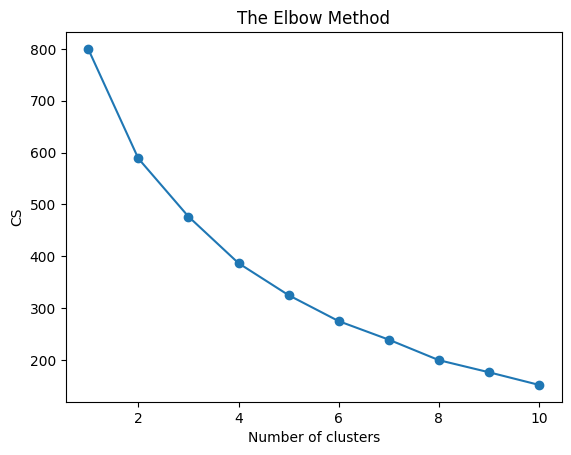

In [22]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs,marker="o")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,random_state=0)

y=kmeans.fit_predict(x)
print(silhouette_score(x,y))

0.25951265087431563


C:\Users\thris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4,random_state=0)

y=kmeans.fit_predict(x)
print(silhouette_score(x,y))

0.3012323168801352


C:\Users\thris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [38]:
from sklearn.cluster import KMeans

kmeanss = KMeans(n_clusters=5,random_state=0)

y=kmeanss.fit_predict(x)
print(silhouette_score(x,y))

0.3179935980678763


C:\Users\thris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


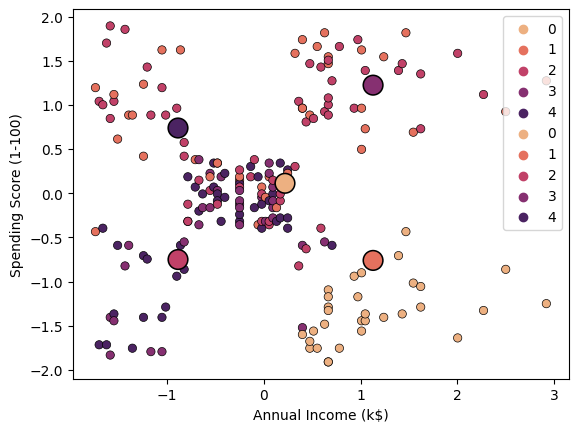

In [39]:
sns.scatterplot(x =x.iloc[ : ,2] ,y =x.iloc[ : ,3] ,
                data =x ,hue =y ,palette='flare' ,edgecolor ='k')

centers_df = pd.DataFrame(kmeanss.cluster_centers_[: , :2], columns=['x', 'y'])
sns.scatterplot(x='x',y='y',data=centers_df,s=200,hue=range(len(centers_df)),
                palette='flare',edgecolor='k' ,markers="X")

plt.show()

In [34]:
x.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

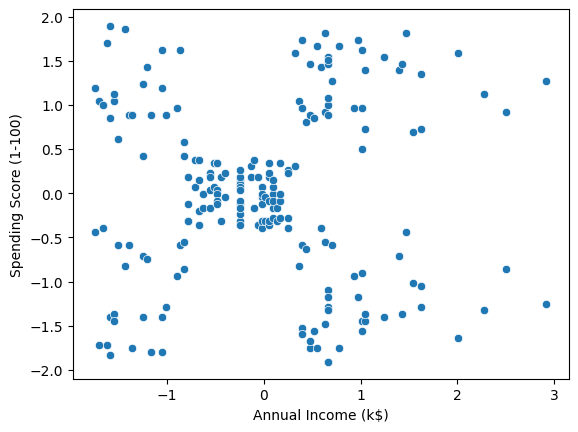

In [35]:
sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=x)

In [41]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

train_pca=pca.fit_transform(x)

In [42]:
dff=pd.DataFrame(train_pca,columns=["PCA1","PCA2"])

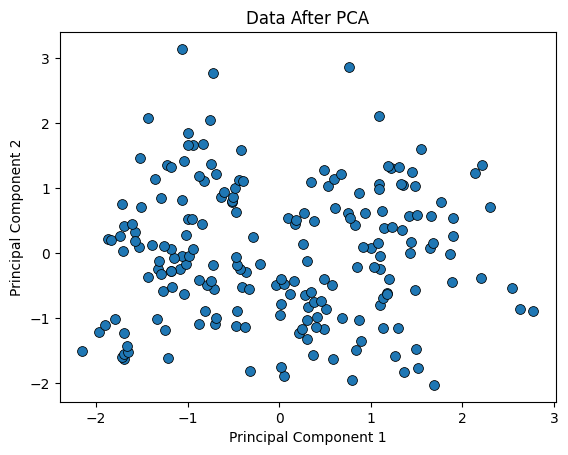

In [43]:
sns.scatterplot(x='PCA1'
                , y='PCA2'
                , data=dff
                , marker='o'
                , s=50
                , edgecolor='k')

plt.title('Data After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

C:\Users\thris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\thris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\thris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

Text(0, 0.5, 'Inertia')

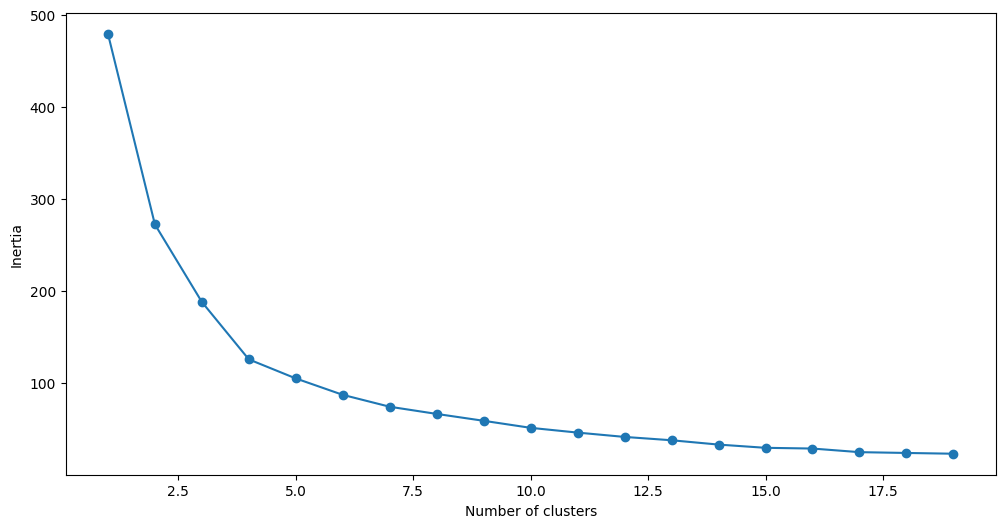

In [47]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(dff)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [48]:
kmeans=KMeans(n_clusters=4)
xx=kmeans.fit_predict(dff)

C:\Users\thris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [49]:
silhouette_score(dff, xx)

0.41507202603711235

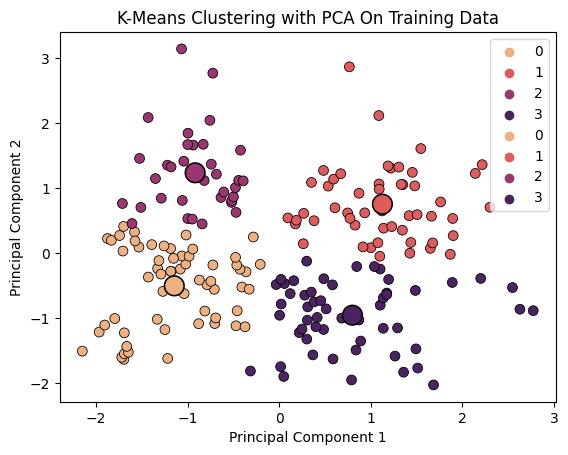

In [50]:
centers_df = pd.DataFrame(kmeans.cluster_centers_[: , :2], columns=['x', 'y'])

sns.scatterplot(x='PCA1'
                , y='PCA2' 
                ,data=dff
                , hue=xx
                , marker='o'
                , s=50
                ,palette='flare'
                ,edgecolor='k')

sns.scatterplot(x='x',y='y',data=centers_df,s=200,hue=range(len(centers_df)),
                palette='flare',edgecolor='k' ,markers="*")

plt.title('K-Means Clustering with PCA On Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

KMEANS USING MOST RELATED COLUMNS

In [53]:
X=x[["Annual Income (k$)","Spending Score (1-100)"]]

In [54]:
k=KMeans(n_clusters=3,random_state=0)
label=k.fit_predict(X)
print(silhouette_score(X,label))

0.46658474419000145


C:\Users\thris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


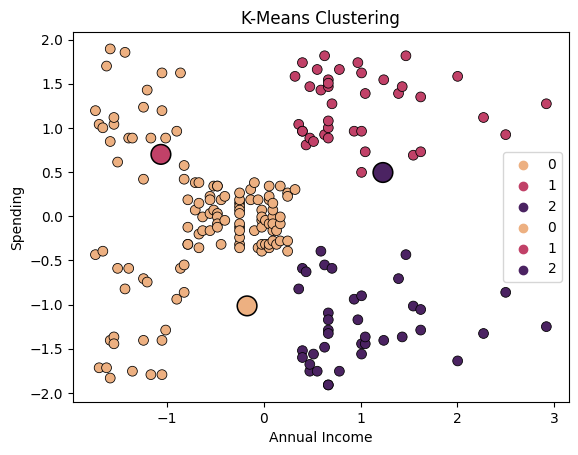

In [55]:
centers_df = pd.DataFrame(kmeans.cluster_centers_[: , :2], columns=['x', 'y'])

sns.scatterplot(x='Annual Income (k$)'
                , y='Spending Score (1-100)' 
                ,data=X
                , hue=label
                , marker='o'
                , s=50
                ,palette='flare'
                ,edgecolor='k')

sns.scatterplot(x='x',y='y',data=centers_df,s=200,hue=range(len(centers_df)),
                palette='flare',edgecolor='k' ,markers="*")

plt.title('K-Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending')

plt.show()

C:\Users\thris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\thris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\thris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

Text(0, 0.5, 'Inertia')

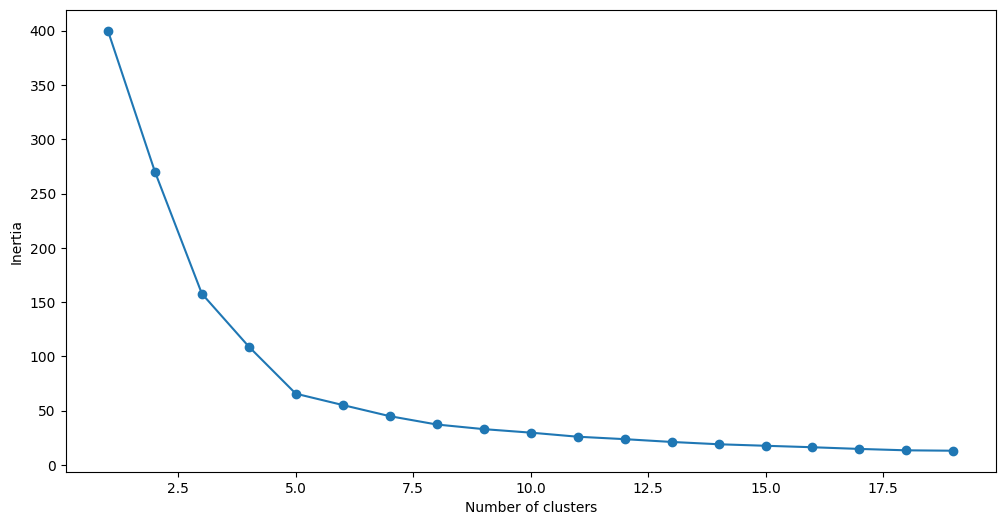

In [56]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [66]:
k=KMeans(n_clusters=4,random_state=0)
label=k.fit_predict(X)
print(silhouette_score(X,label))

0.4939069237513199


C:\Users\thris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


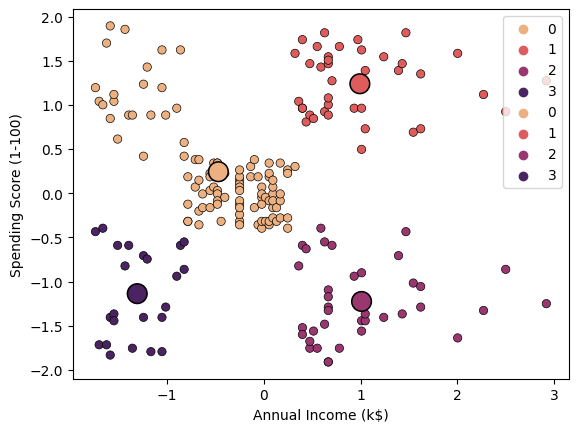

In [68]:
sns.scatterplot(x ='Annual Income (k$)'
                , y='Spending Score (1-100)' ,
                data =X ,hue =label ,palette='flare' ,edgecolor ='k')

centers_df = pd.DataFrame(k.cluster_centers_[: , :2], columns=['x', 'y'])
sns.scatterplot(x='x',y='y',data=centers_df,s=200,hue=range(len(centers_df)),
                palette='flare',edgecolor='k' ,markers="X")

plt.show()

In [73]:
k=KMeans(n_clusters=5,random_state=0)
label=k.fit_predict(X)
print(silhouette_score(X,label))

0.5546571631111091


C:\Users\thris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


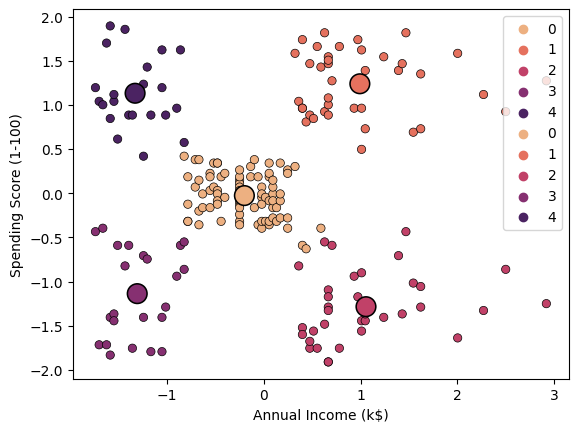

In [71]:
sns.scatterplot(x ='Annual Income (k$)'
                , y='Spending Score (1-100)' ,
                data =X ,hue =label ,palette='flare' ,edgecolor ='k')

centers_df = pd.DataFrame(k.cluster_centers_[: , :2], columns=['x', 'y'])
sns.scatterplot(x='x',y='y',data=centers_df,s=200,hue=range(len(centers_df)),
                palette='flare',edgecolor='k' ,markers="X")

plt.show()

DBSCAN 

In [81]:
dt=pd.read_csv("C:\\Users\\thris\\Desktop\\Mall_Customers.csv")
dt.head(1)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39


In [83]:
X=dt.iloc[:,3:]
X.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [84]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(X) # fitting the data to the object
distances,indices=nbrs.kneighbors(X) 

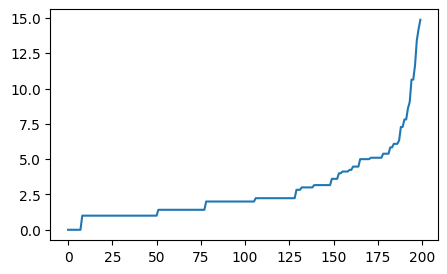

In [85]:
import numpy as np
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show()

From the above plot, we note the maximum curvature of the curve is about eight, and thus we picked our Eps as 8.

We now have our two parameters as:

MinPoints = 4
Eps = 8

In [91]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 8, min_samples = 4).fit(X) # fitting the model


In [94]:
labels = dbscan.labels_

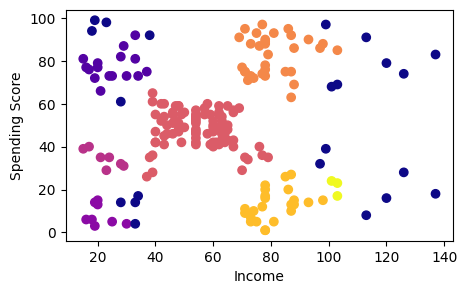

In [90]:
plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Income") # X-axis label
plt.ylabel("Spending Score") # Y-axis label
plt.show() # showing the plot


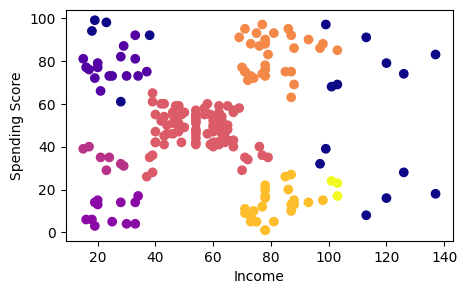

In [95]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 8.5, min_samples = 4).fit(X) # fitting the model
labels = dbscan.labels_

plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Income") # X-axis label
plt.ylabel("Spending Score") # Y-axis label
plt.show()

HERIRARCHIAL

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\thris\\Desktop\\Mall_Customers.csv")
X=df.iloc[:,3:]

In [14]:
X.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [17]:

from sklearn.preprocessing import normalize
data_scaled = normalize(X)
data_scaled = pd.DataFrame(data_scaled, columns=X.columns)
data_scaled.head()

,Annual Income (k$),Spending Score (1-100)
0,0.358979,0.933346
1,0.182089,0.983282
2,0.936329,0.351123
3,0.203446,0.979086
4,0.391141,0.920331


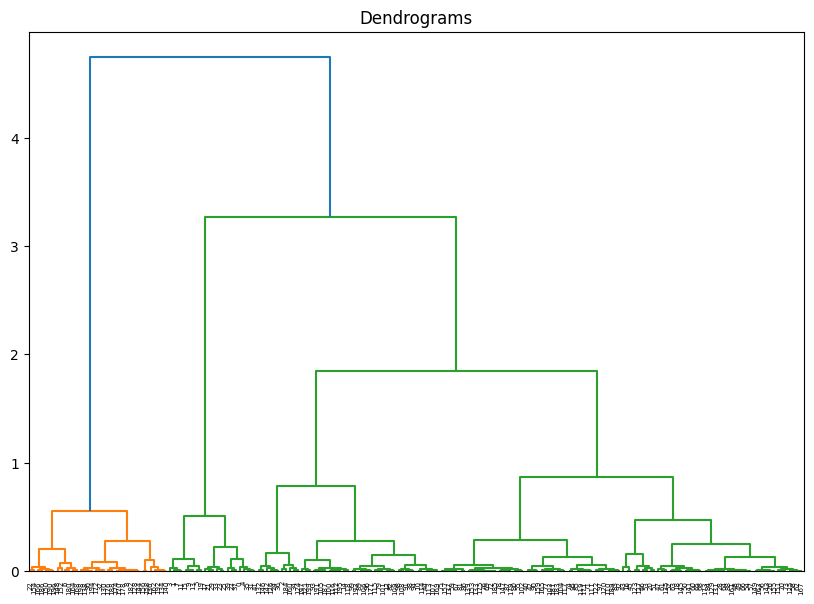

In [20]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

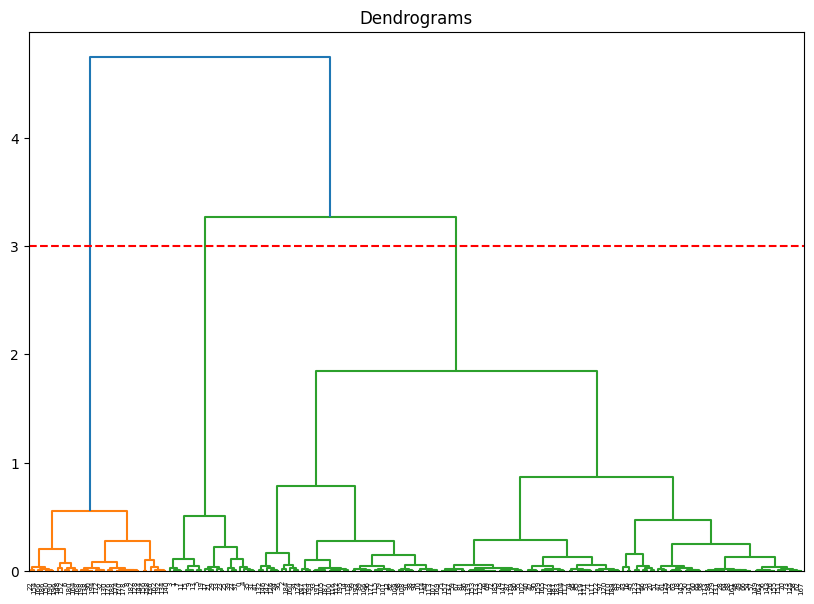

In [21]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=3, color='r', linestyle='--')


In [28]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

C:\Users\thris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int64)

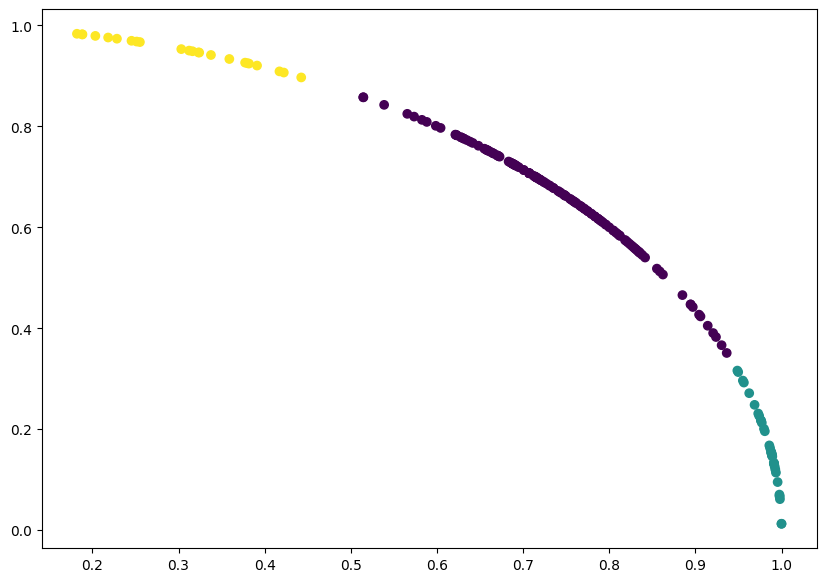

In [29]:

plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled["Annual Income (k$)"], data_scaled["Spending Score (1-100)"], c=cluster.labels_) 

GAUSSIAN MODEL MIXTURE

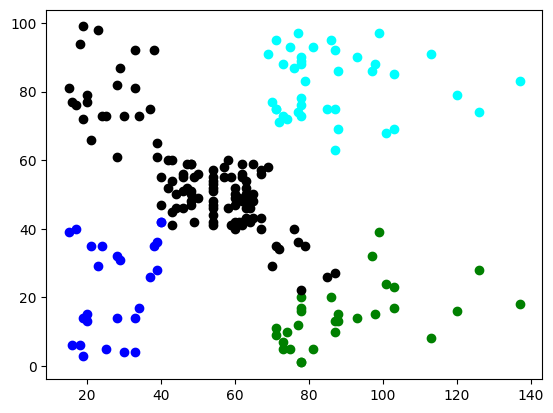

In [7]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(X)

#predictions from gmm
labels = gmm.predict(X)
frame = pd.DataFrame(X)
frame['cluster'] = labels
frame.columns = ["Annual Income (k$)", "Spending Score (1-100)", "cluster"]

color=['blue','green','cyan', 'black']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Annual Income (k$)"],data["Spending Score (1-100)"],c=color[k])
plt.show()

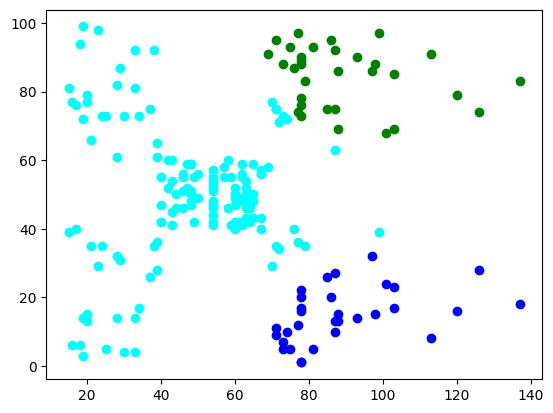

In [9]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(X)

#predictions from gmm
labels = gmm.predict(X)
frame = pd.DataFrame(X)
frame['cluster'] = labels
frame.columns = ["Annual Income (k$)", "Spending Score (1-100)", "cluster"]

color=['blue','green','cyan']
for k in range(0,3):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Annual Income (k$)"],data["Spending Score (1-100)"],c=color[k])
plt.show()

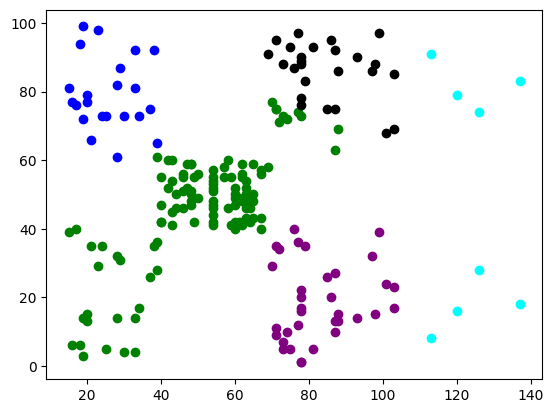

In [10]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5)
gmm.fit(X)

#predictions from gmm
labels = gmm.predict(X)
frame = pd.DataFrame(X)
frame['cluster'] = labels
frame.columns = ["Annual Income (k$)", "Spending Score (1-100)", "cluster"]

color=['blue','green','cyan',"black","purple"]
for k in range(0,5):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Annual Income (k$)"],data["Spending Score (1-100)"],c=color[k])
plt.show()

KMEANS CLUSTERING WORKS WELL !